In [42]:
%matplotlib inline
%pylab inline
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)
from tsne import bh_sne
from matplotlib import pyplot as plt
import pandas
import scipy
import numpy as np
import sklearn.manifold
import os
import gc
from time import gmtime, strftime
import seaborn as sns
from os import listdir
from os.path import isfile, join
import math
from scipy.stats.stats import pearsonr
import random as rand


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [43]:
def load_data(path, shuffle = True, normalize = True):
    gc.collect()
    labels = list(pandas.read_hdf(path, '/df').columns.values)#.get('accrued_depr_pct')
    data = pandas.read_hdf(path, '/df')
    
    np_data = np.array(data).astype(float)
    del(data)
    data=None
    #np_data = np_data / np_data.max(axis=0)
    def scale_linear_by_column(rawpoints, high=1.0, low=0.0):
        mins = np.min(rawpoints, axis=0)
        maxs = np.max(rawpoints, axis=0)
        rng = maxs - mins
        return high - (((high - low) * (maxs - rawpoints)) / rng)
    if normalize:
        np_data = scale_linear_by_column(np_data)
    
    if shuffle:
        np.random.shuffle(np_data)
        print "shufflin:!!!"
    np.nan_to_num(np_data)
    
    np_data[np.isnan(np_data)] = 0.0
    
    return np_data, labels

def load_nonumerical_data(path):
    gc.collect()
    labels = list(pandas.read_hdf(path, '/df').columns.values)#.get('accrued_depr_pct')
    data = pandas.read_hdf(path, '/df')
    return data, labels

def print_columns(path):
    labels = list(pandas.read_hdf(path, '/df').columns.values)#.get('accrued_depr_pct')
    print labels


In [59]:
def visualize(muh_data, buckets = 100, show=False, size=40, path=None, 
              bandwidth=2, display_mode='kde', color = None, glyph = '+'):
    vis_x = muh_data[:, 0]
    vis_y = muh_data[:, 1]


    #histogram definition
    if size == None:
        xyrange = [[min(vis_x),max(vis_x)],[min(vis_y),max(vis_y)]]
    else:
        xyrange = [[-size,size],[-size,size]] # data range
    bins = [buckets,buckets] # number of bins
    
    if(show):
        #
        #sns.set(color_codes=True)
        if(display_mode=='kde'):
            fig = plt.figure(frameon=False)
            fig.set_size_inches(30,30)
            sns.kdeplot(vis_x, vis_y, shade=True,  n_levels=20, bw=bandwidth)
        elif display_mode == 'hex':
            sns.jointplot(x=vis_x, y=vis_y, kind="hex", color="k", size = 30)
        elif display_mode == 'hist':
            hh, locx, locy = scipy.histogram2d(vis_x, vis_y, range=xyrange, bins=bins)
            fig = plt.figure(frameon=False)
#             fig.set_size_inc
hes(30,30)
            plt.imshow(np.flipud(hh.T),cmap='jet', extent=np.array(xyrange).flatten(), interpolation='none', shape = (1000,1000))
            plt.colorbar()
        elif display_mode == 'colored':
            #plt.gray()
            fig = plt.figure(frameon=False)
            fig.set_size_inches(30,30)
            plt.scatter(vis_x, vis_y, c=color,  marker=glyph, facecolor='b', cmap='jet')

            
            #fig.patch.set_facecolor('blue')

            #plt.set_axis_bgcolor((0, .5, .5))
            #plt.imshow(np.flipud(hh.T),cmap='jet',extent=np.array(xyrange).flatten(), interpolation='none', shape = (1000,1000))
            plt.colorbar()
        plt.show()
    else:
        assert(path != None)
        save_path = folder+"".join(path.split('/')[-2:])
        save_path = save_path+"_buckets:"+str(buckets)
        save_path = save_path  +".png"
        plt.savefig(save_path)
    #plt.clf()

def save(muh_data, folder, tag=""):
    save_path = folder+"np_array_"+tag
    print "saving to",save_path
    np.save(save_path,muh_data)

IndentationError: unexpected indent (<ipython-input-59-cc7acd692ae3>, line 28)

## tSNE embedding

In [ ]:
def process_full():
    paths = ["/home/isaac/Dropbox/data_for_brian/hcad_features/hcad_df.hd",
#              "/home/isaac/Dropbox/data_for_brian/hcad_features/hcad_df_100.hd",
             #"/home/isaac/Dropbox/data_for_brian/hcad_features/hcad_df_200.hd",
             #"/home/isaac/Dropbox/data_for_brian/hcad_features/hcad_df_400.hd",
             # "/home/isaac/Dropbox/data_for_brian/hcad_features/hcad_df_1000.hd",
              #"/home/isaac/Dropbox/data_for_brian/terrain_features/dsmgrid/terrain_100.hd",
#              "/home/isaac/Dropbox/data_for_brian/terrain_features/dsmgrid/terrain_200.hd",
#              "/home/isaac/Dropbox/data_for_brian/terrain_features/dsmgrid/terrain_400.hd",
#              "/home/isaac/Dropbox/data_for_brian/terrain_features/dsmgrid/terrain_1000.hd",
#               "/home/isaac/Dropbox/data_for_brian/terrain_features/dtmgrid/terrain_100.hd",
#              "/home/isaac/Dropbox/data_for_brian/terrain_features/dtmgrid/terrain_200.hd",
#              "/home/isaac/Dropbox/data_for_brian/terrain_features/dtmgrid/terrain_400.hd",
#              "/home/isaac/Dropbox/data_for_brian/terrain_features/dtmgrid/terrain_1000.hd",
#              "/home/isaac/Dropbox/data_for_brian/wind_features/hcad_interp_withoutpartial_rad100_hist8x8.mat.hd",
#              "/home/isaac/Dropbox/data_for_brian/wind_features/hcad_interp_withoutpartial_rad100_hist16x16.mat.hd",
#              "/home/isaac/Dropbox/data_for_brian/wind_features/hcad_interp_withoutpartial_rad100_hist36x36.mat.hd",
#              "/home/isaac/Dropbox/data_for_brian/wind_features/hcad_interp_withoutpartial_rad200_hist8x8.mat.hd",
#              "/home/isaac/Dropbox/data_for_brian/wind_features/hcad_interp_withoutpartial_rad200_hist16x16.mat.hd",
#              "/home/isaac/Dropbox/data_for_brian/wind_features/hcad_interp_withoutpartial_rad200_hist36x36.mat.hd",
#              "/home/isaac/Dropbox/data_for_brian/wind_features/hcad_interp_withoutpartial_rad400_hist8x8.mat.hd",
#              "/home/isaac/Dropbox/data_for_brian/wind_features/hcad_interp_withoutpartial_rad400_hist16x16.mat.hd",
#              "/home/isaac/Dropbox/data_for_brian/wind_features/hcad_interp_withoutpartial_rad400_hist36x36.mat.hd",
#              "/home/isaac/Dropbox/data_for_brian/wind_features/hcad_interp_withoutpartial_rad1000_hist8x8.mat.hd",
#              "/home/isaac/Dropbox/data_for_brian/wind_features/hcad_interp_withoutpartial_rad1000_hist16x16.mat.hd",
#              "/home/isaac/Dropbox/data_for_brian/wind_features/hcad_interp_withoutpartial_rad1000_hist36x36.mat.hd"
            ]

    folder = "./autorun13_unshuffled/"
    if not os.path.exists(folder):
        os.makedirs(folder)
    print "started at "+strftime("%Y-%m-%d %H:%M:%S", gmtime())
    vis_data = None
    for path in paths:
        np_data, column_labels = load_data(path, shuffle = False, normalize=True)
        for n in [None]:
            sliced_np_data = np_data[:n]
            # eliminate the HCAD number column
            sliced_np_data_withou_hcad  = sliced_np_data[:,1:] 
            vis_data = bh_sne(sliced_np_data_withou_hcad, perplexity=1)
            dataset_name = path.split('/')[-1].split('.')[0]
            save(np.append(vis_data, sliced_np_data,1), folder, tag = "n="+str(n)+"_of_"+dataset_name+"_perp_1")
            for i in range(1, len(np_data[0,:])):
                print "\n"+"="*20
                print "dataset:", dataset_name
                print "sample size:",len(vis_data)
                print "\ncolumn:",column_labels[i]+":"
                colors = np_data[:n,i]
                print "log plot:"
                visualize(vis_data, show=True, display_mode = 'colored', color = np.log(colors+.1))
                print "linear plot:"
                visualize(vis_data, show=True, display_mode = 'colored', color = colors)

            del(vis_data)
            vis_data=None
            print "done with "+path+" at "+strftime("%Y-%m-%d %H:%M:%S", gmtime())
        del(np_data)
        np_data=None
        gc.collect()
            
process_full()

started at 2016-01-22 20:41:19
Opening /home/isaac/Dropbox/data_for_brian/hcad_features/hcad_df.hd in read-only mode
Opening /home/isaac/Dropbox/data_for_brian/hcad_features/hcad_df.hd in read-only mode

Opening /home/isaac/Dropbox/data_for_brian/y_df.hd in read-only mode
Opening /home/isaac/Dropbox/data_for_brian/y_df.hd in read-only mode
total number of tsne points loaded 870476
number of damaged points 275765


---->n=n=None of_hcad_df_perp_1.npy
kde bandwidth 1
damaged


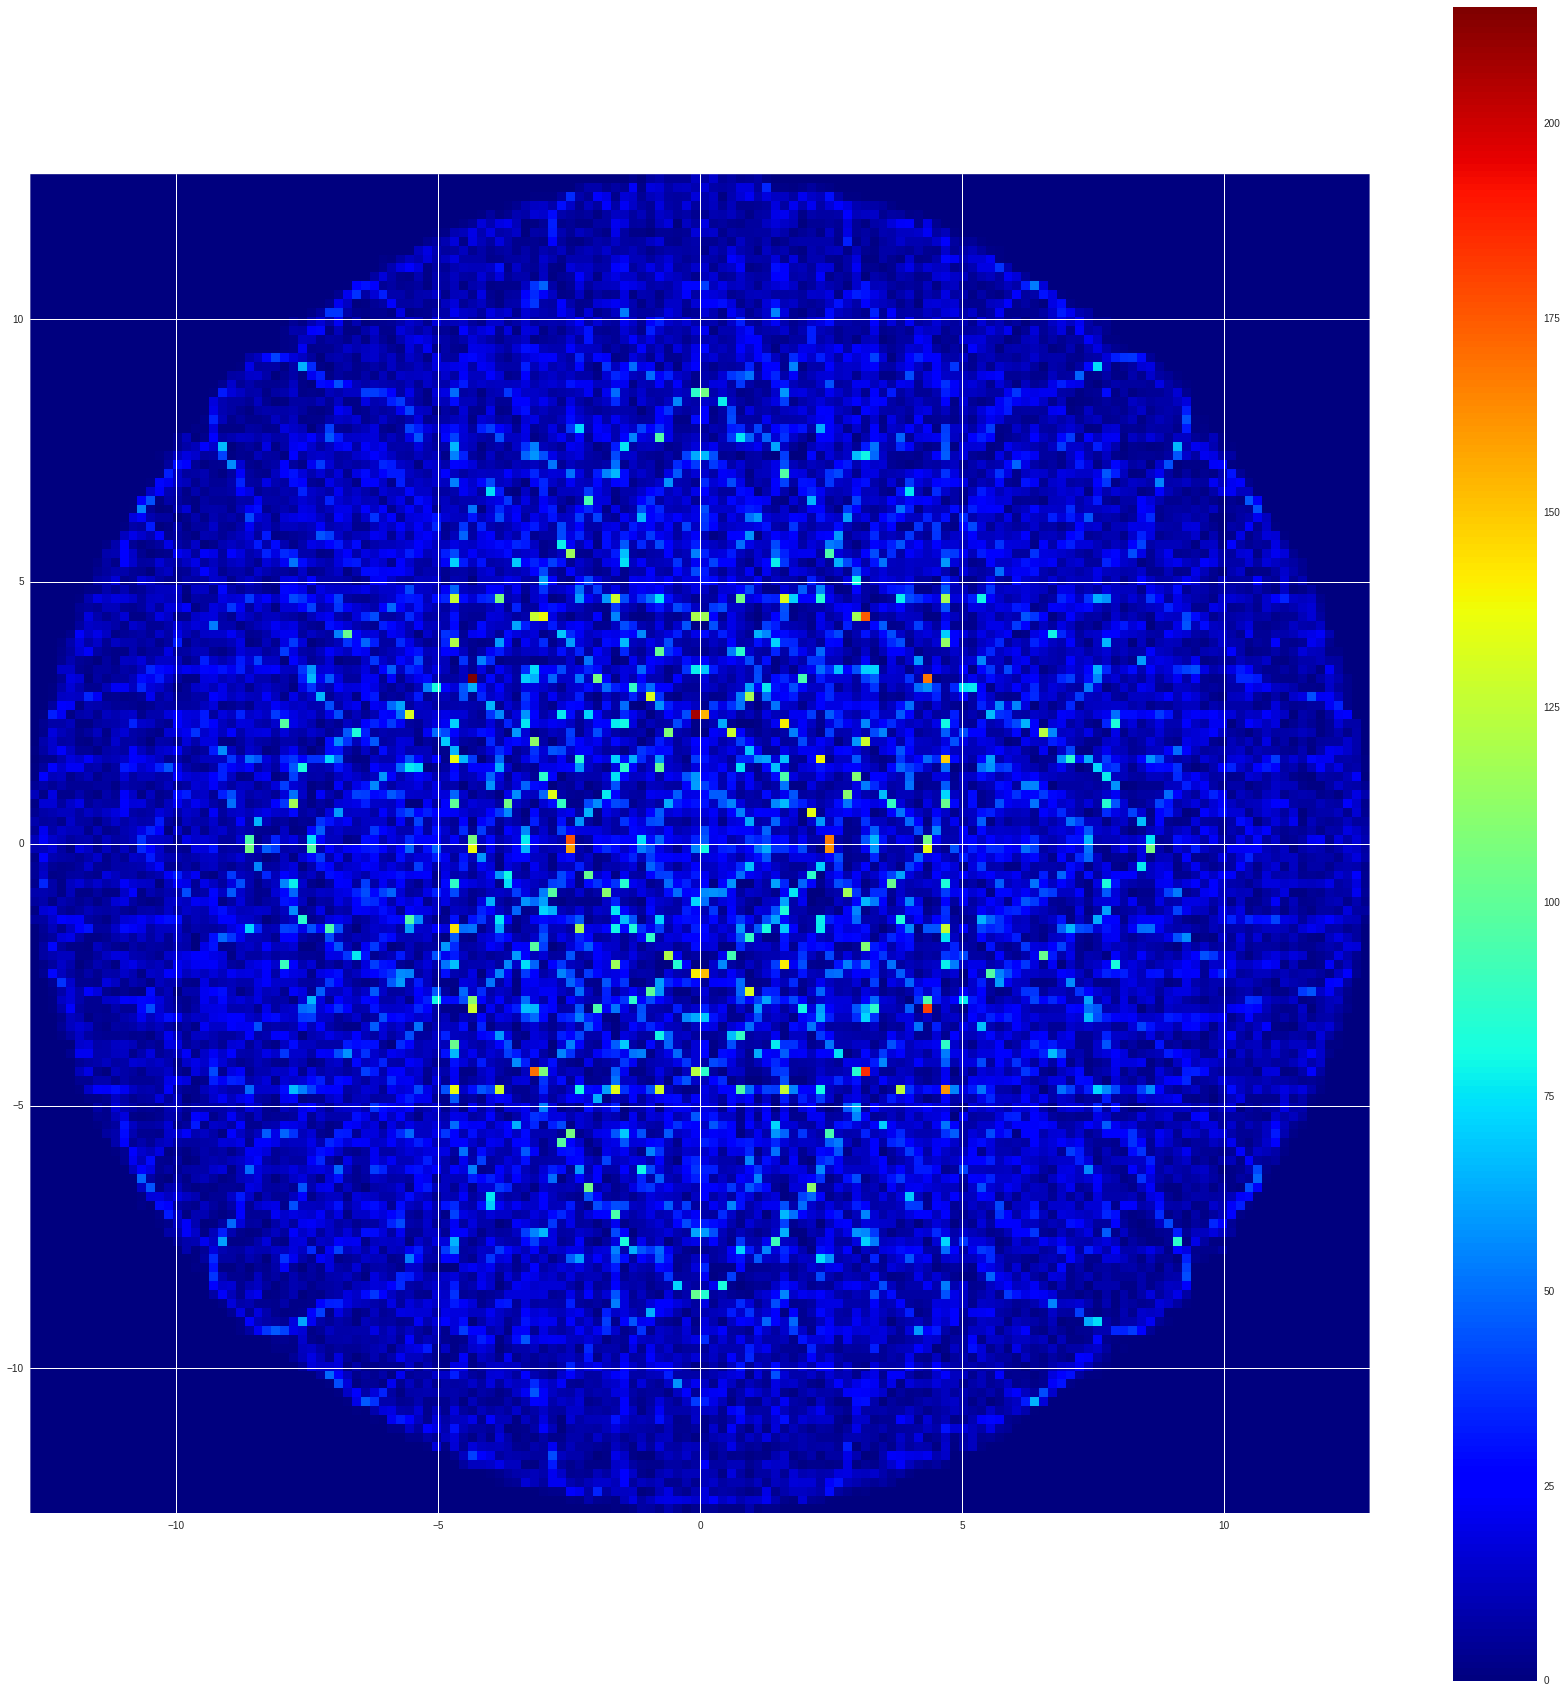

undamaged


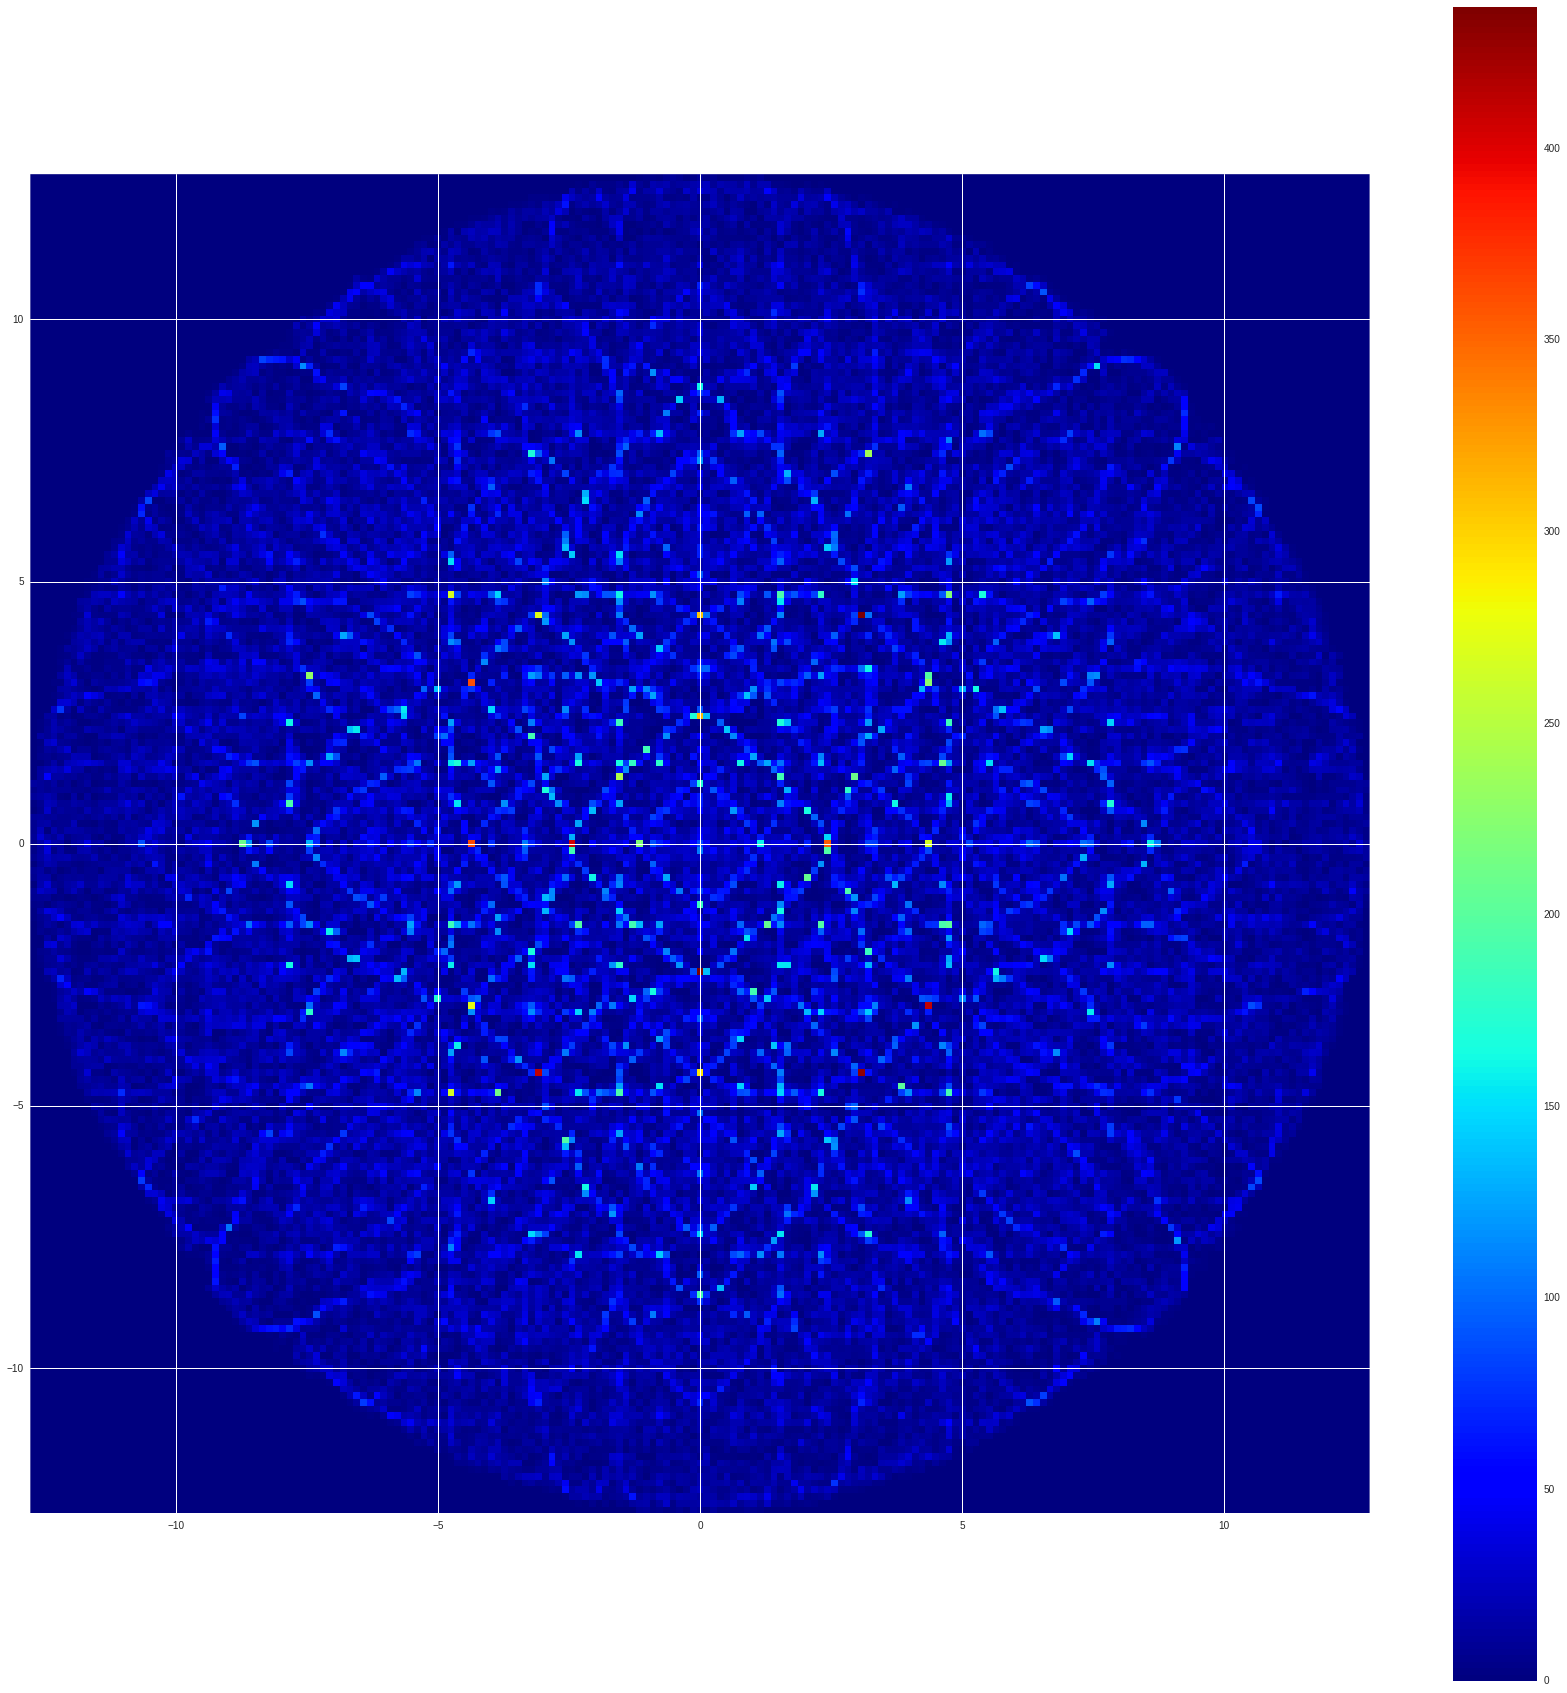

hex histogram


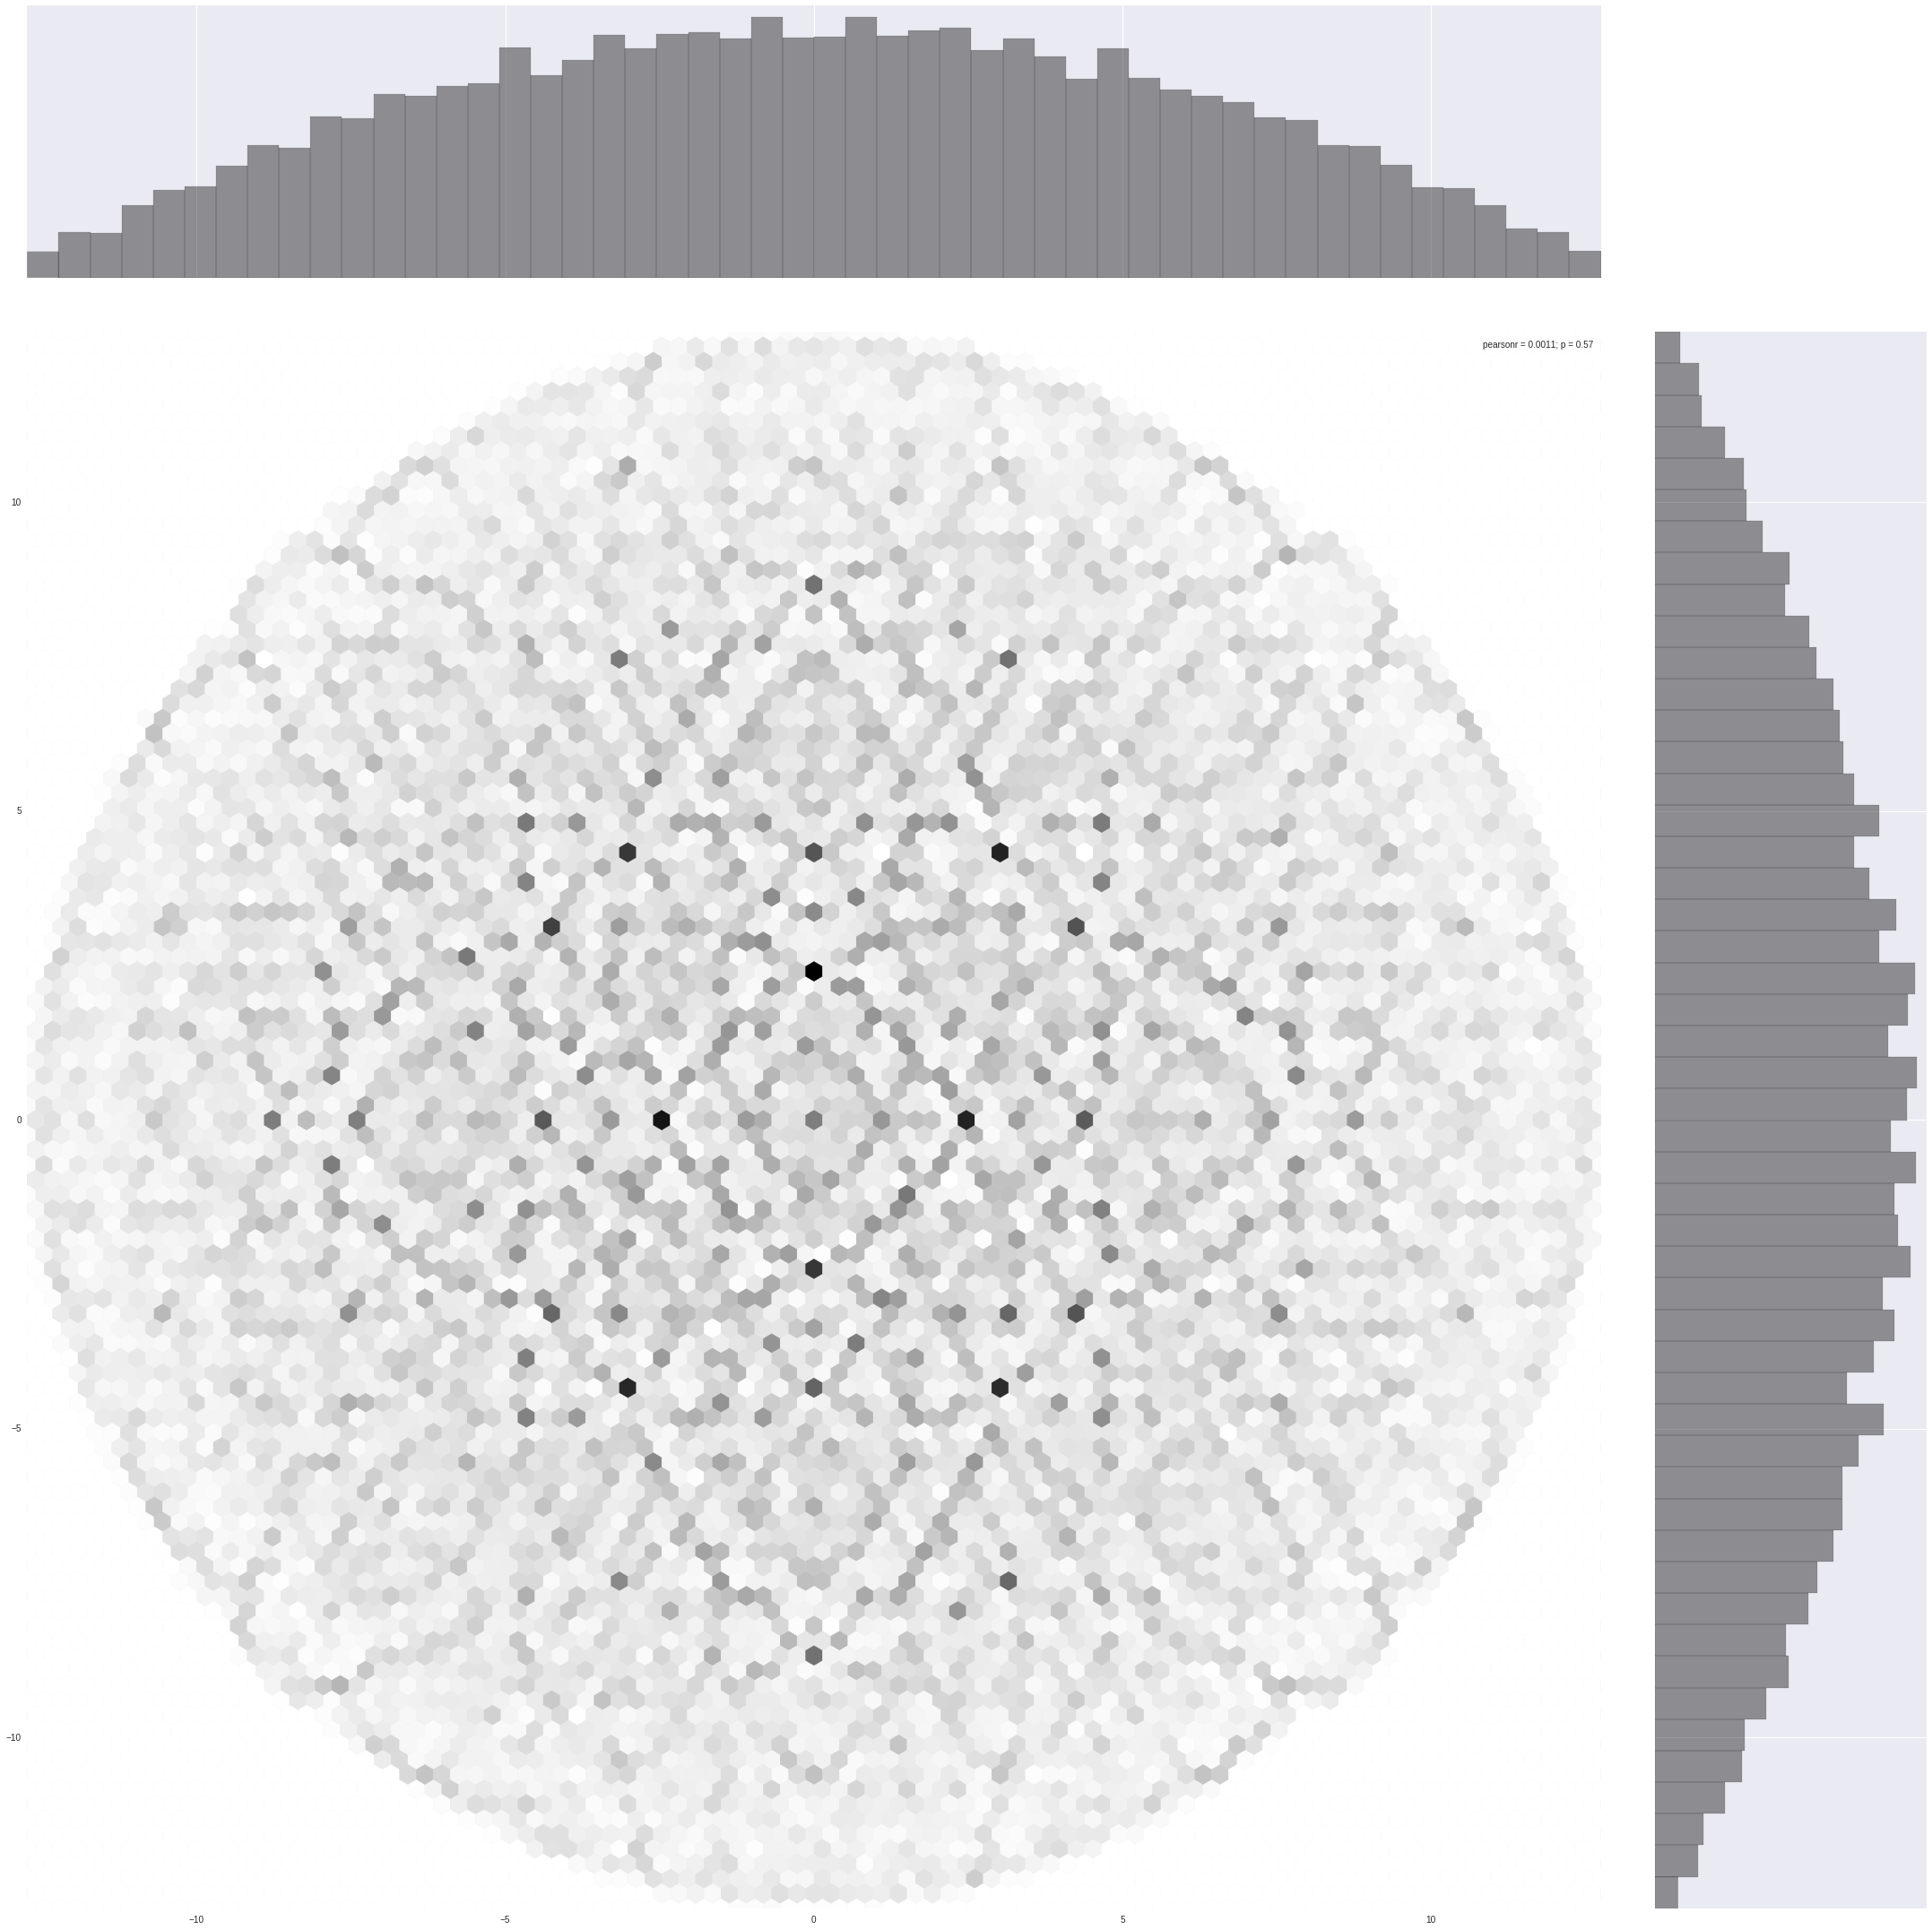

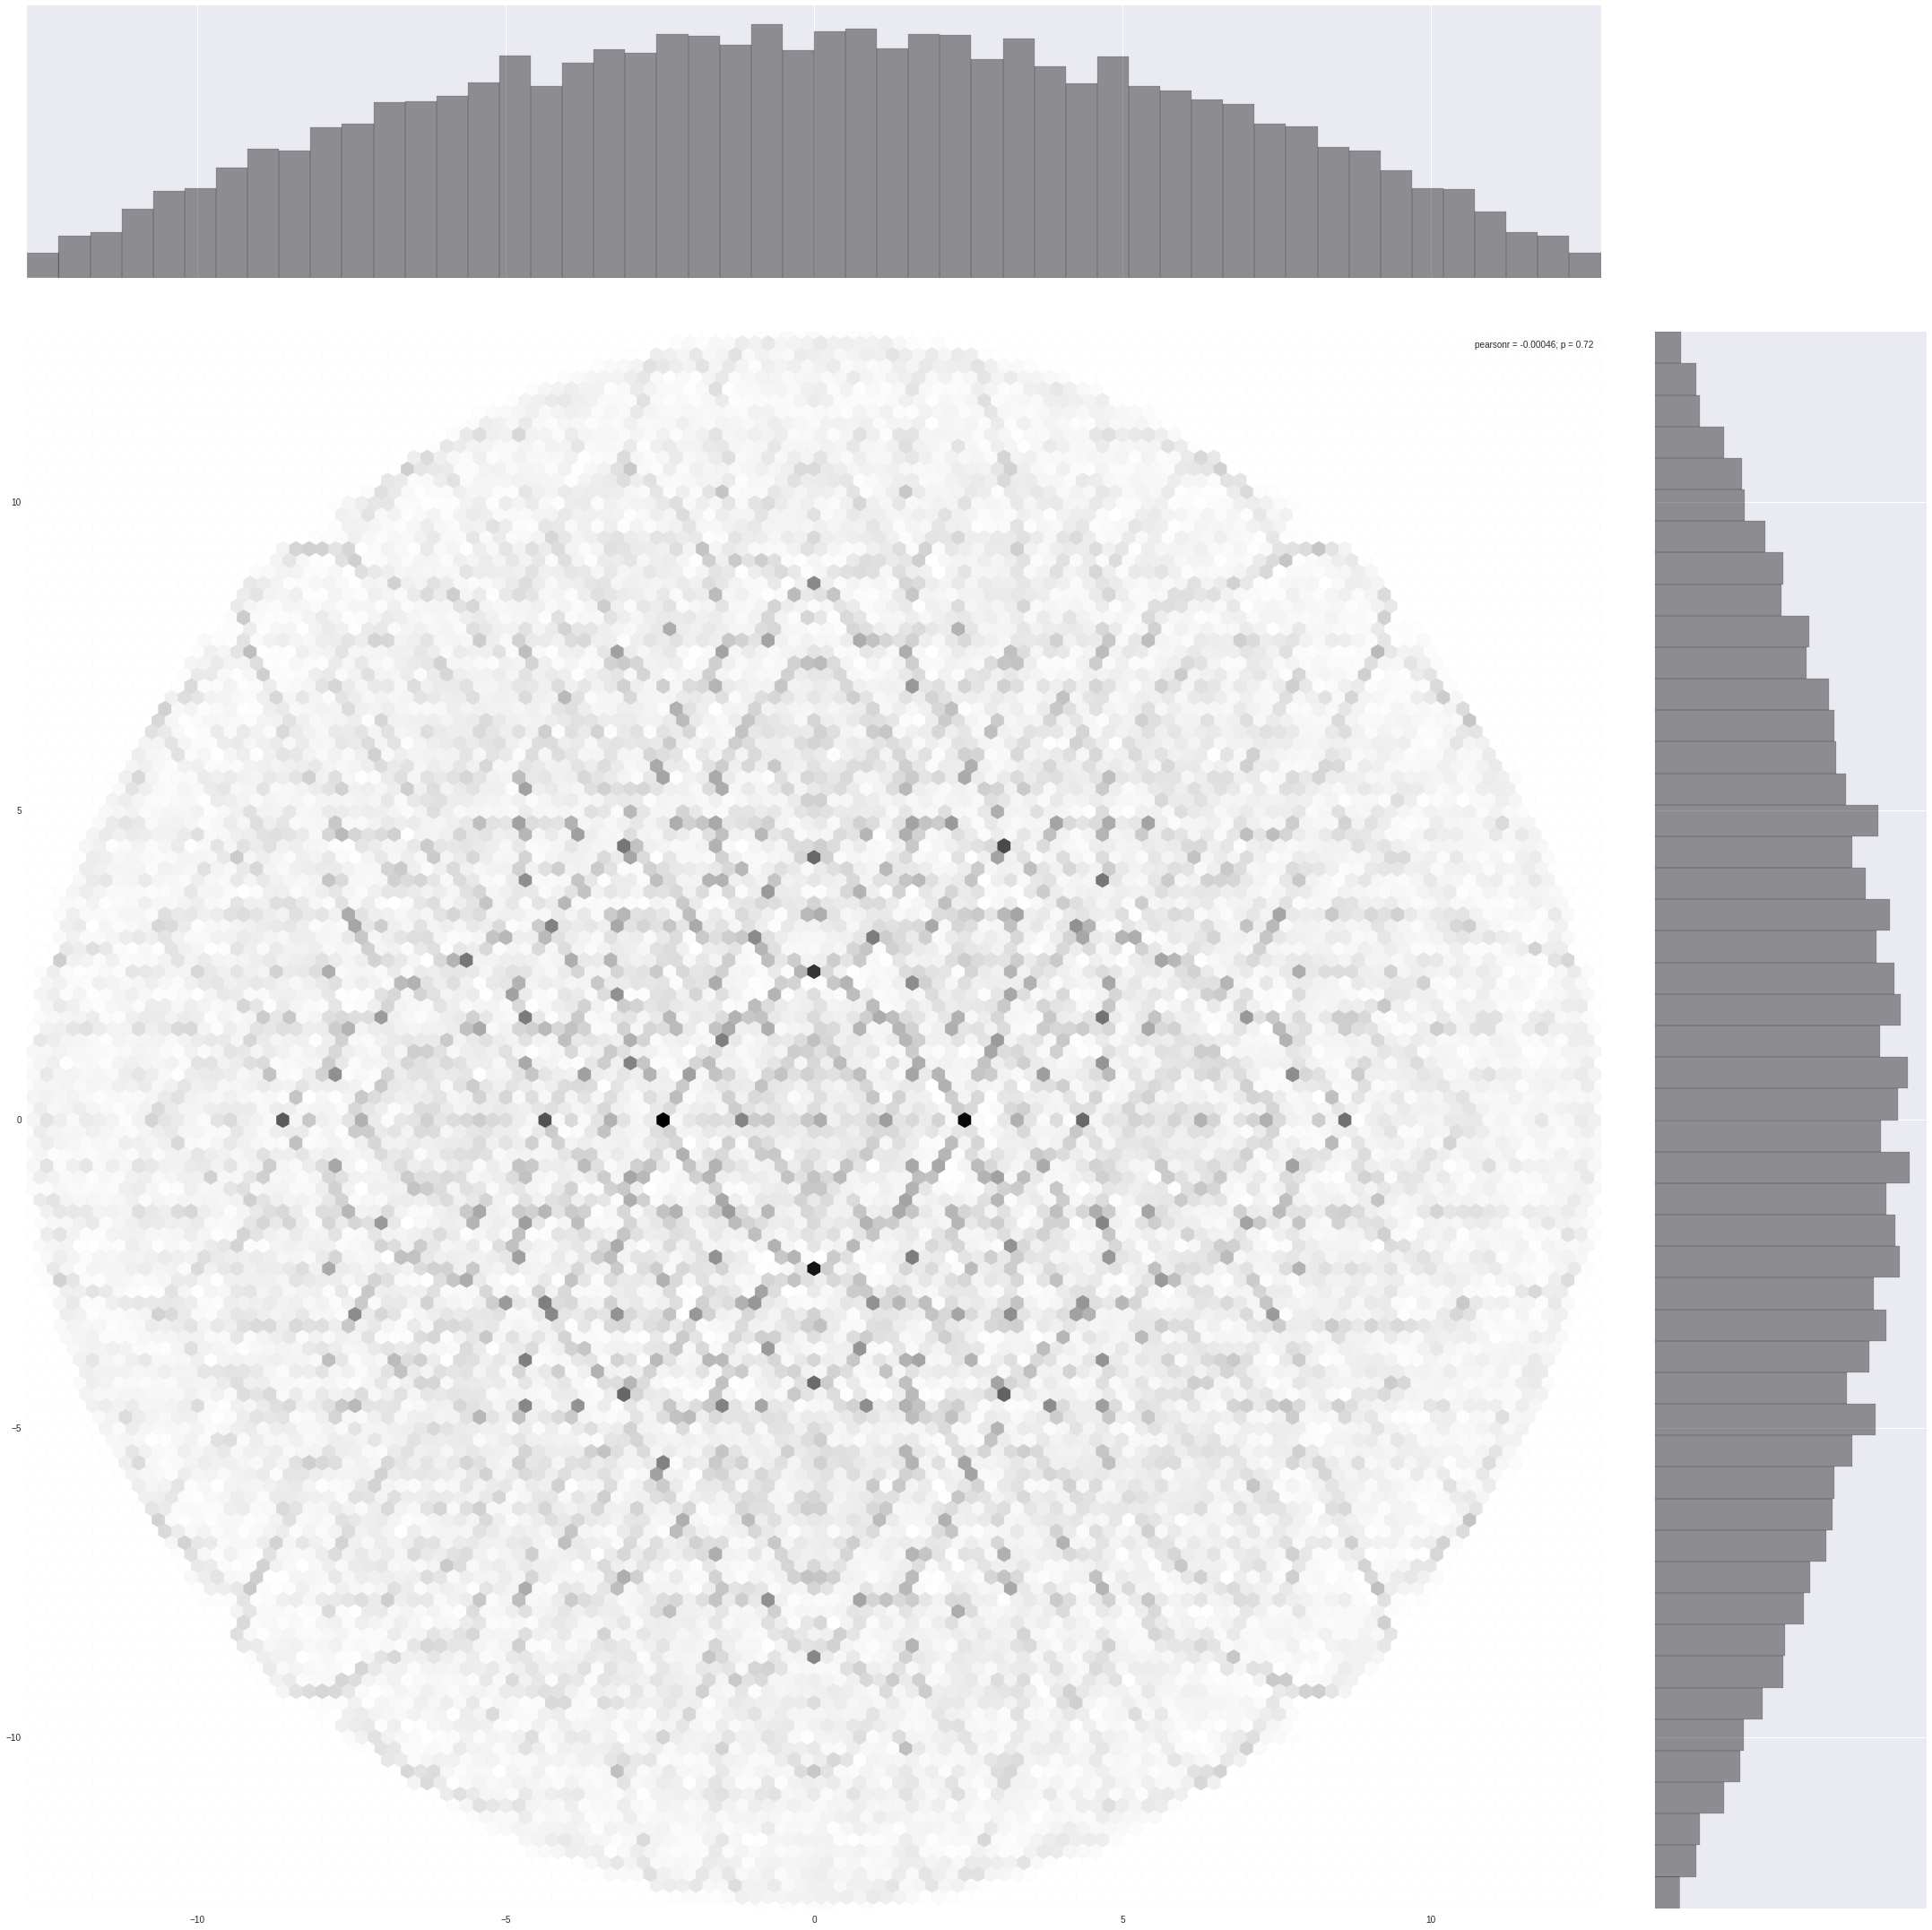

In [64]:
def visualize_all_data():
    mypath = "/home/isaac/Desktop/devika/autorun13_unshuffled/"
    onlyfiles = [ f for f in listdir(mypath) if isfile(join(mypath,f)) ]

    for file in onlyfiles:
        if file == "np_array_n=None_of_hcad_df_perp_1.npy":
            load_path = mypath+str(file)#np_array_8000_terrain_100.npy"
            y_data = (np.array(load_nonumerical_data("/home/isaac/Dropbox/data_for_brian/y_df.hd")[0]["y100_mean"]))
            tsne_data = np.load(load_path)
            print "total number of tsne points loaded", len(tsne_data)

            damaged_indices = filter(lambda i: y_data[i] != 0.0, list(range(len(y_data))))
            damaged_embedding_points= np.array([tsne_data[x] for x in damaged_indices])
            undamaged_indices = filter(lambda i: y_data[i] == 0.0, list(range(len(y_data))))
            undamaged_embedding_points= np.array([tsne_data[x] for x in undamaged_indices])
                
            print "number of damaged points", len(damaged_embedding_points)

            
            
            print "\n\n---->n="+file.split('_')[2] + " " + '_'.join(file.split('_')[3:])
            print "kde bandwidth 1"
            size = max([max(tsne_data[:,0]),max(tsne_data[:,1]),abs(min(tsne_data[:,0])),abs(min(tsne_data[:,1]))])
            print "damaged"
            visualize(damaged_embedding_points, show=True, size=size, bandwidth=.1, display_mode='hist', buckets= 150)
            print "undamaged"
            visualize(undamaged_embedding_points, show=True, size=size, bandwidth=.1, display_mode='hist', buckets= 199)

            #print "kde bandwidth 2"
            #visualize(loaded_data, show=True, size=size, bandwidth=2)
            print "hex histogram"
            visualize(damaged_embedding_points, show=True, size=size, bandwidth=1, display_mode='hex')
            visualize(undamaged_embedding_points, show=True, size=size, bandwidth=1, display_mode='hex')
            #print "histogram"
            #visualize(loaded_data, show=True, size=size, bandwidth=1, display_mode='hist')
visualize_all_data()

In [47]:
def run_tests():
    path = "/home/isaac/Dropbox/data_for_brian/hcad_features/hcad_df.hd"
    np_data, labels = load_data(path)
    for i in range(len(np_data[0])):
        col = np_data[:,i]
        assert len(np_data[0]) == len(labels)
        assert len(col) == 870476
        assert np.max(col) == 1.0
        assert np.min(col) == 0.0
    print "tests pass"
#run_tests()

## Plots of data mapped to space

In [48]:
print_columns("/home/isaac/Dropbox/data_for_brian/meta/df_meta.hd")
print_columns("/home/isaac/Dropbox/data_for_brian/hcad_features/hcad_df.hd")

Opening /home/isaac/Dropbox/data_for_brian/meta/df_meta.hd in read-only mode
['hcad', 'lat', 'lon', 'pointx', 'pointy', 'keymap', 'img0', 'img1']
Opening /home/isaac/Dropbox/data_for_brian/hcad_features/hcad_df.hd in read-only mode
['accrued_depr_pct', 'active_area', 'assessed_val', 'base_area', 'bld_ar', 'bld_val', 'bldg_adj', 'cama_replacement_cost', 'dpr_val', 'effective_area', 'gross_area', 'heated_area', 'improved_sqft', 'land_ar', 'land_val', 'new_construction_val', 'perimeter', 'prior_bld_val', 'prior_land_val', 'prior_tot_appr_val', 'prior_tot_mkt_val', 'prior_x_features_val', 'quality', 'rcnld', 'size_index', 'tot_appr_val', 'tot_mkt_val', 'tot_rcn_val', 'x_features_val', 'year_built', 'year_remodeled', 'yr_impr']


In [49]:
from random import sample
def print_damage_columns():
    y_data = load_nonumerical_data("/home/isaac/Dropbox/data_for_brian/y_df.hd")
    print y_data
#print_meta_columns()

def plot_data_on_map():
    meta_data = load_nonumerical_data("/home/isaac/Dropbox/data_for_brian/meta/df_meta.hd")
    hcad_data, labels = load_data("/home/isaac/Dropbox/data_for_brian/hcad_features/hcad_df_1000.hd",
                                  shuffle = False, normalize = False)

#     print meta_data
#     print "======================"
#     print hcad_data
#     print labels
    sample_size = len(hcad_data)
    sample_indices = sample(xrange(len(hcad_data)), sample_size)
    xy_points = np.array(zip(meta_data[0].lon,meta_data[0].lat))
    for i in range(3,len(labels)):
        print labels[i]
        hcad_column = hcad_data[:,i]
#         xy_points_sample = []
#         color_sample = []
#         for index in sample_indices:
#             xy_points_sample.append(xy_points[index])
#             color_sample.append(hcad_column[index])

#         xy_points_sample =np.array(xy_points_sample)
#         color_sample = np.log(np.array(color_sample).astype(float))

        # histogram the colors
        plt.hist(np.clip(hcad_column,0,300000), 100, normed=1, facecolor='green', alpha=0.75)
        plt.show()

        #numpy.random.shuffle(color_sample)
#         visualize(xy_points_sample, 
#               size=None,show = True, display_mode='colored', 
#               color = color_sample)
        visualize(xy_points, 
            size=None,show = True, display_mode='colored', 
            color = np.clip(hcad_column,0,300000))

        color_sample = None
        #for i in range(1000):
#plot_data_on_map()

## color tSNE plots by damage

Opening /home/isaac/Dropbox/data_for_brian/y_df.hd in read-only mode
Opening /home/isaac/Dropbox/data_for_brian/y_df.hd in read-only mode
[ 1.  0.  0. ...,  0.  0.  0.]
[[ 2.84811252  4.19081313]
 [-1.39449773  7.10989884]
 [ 5.16980392 -6.33345304]
 ..., 
 [ 0.4894147  -1.41374916]
 [-1.59797517  1.37368297]
 [ 3.24972399  6.80865251]]


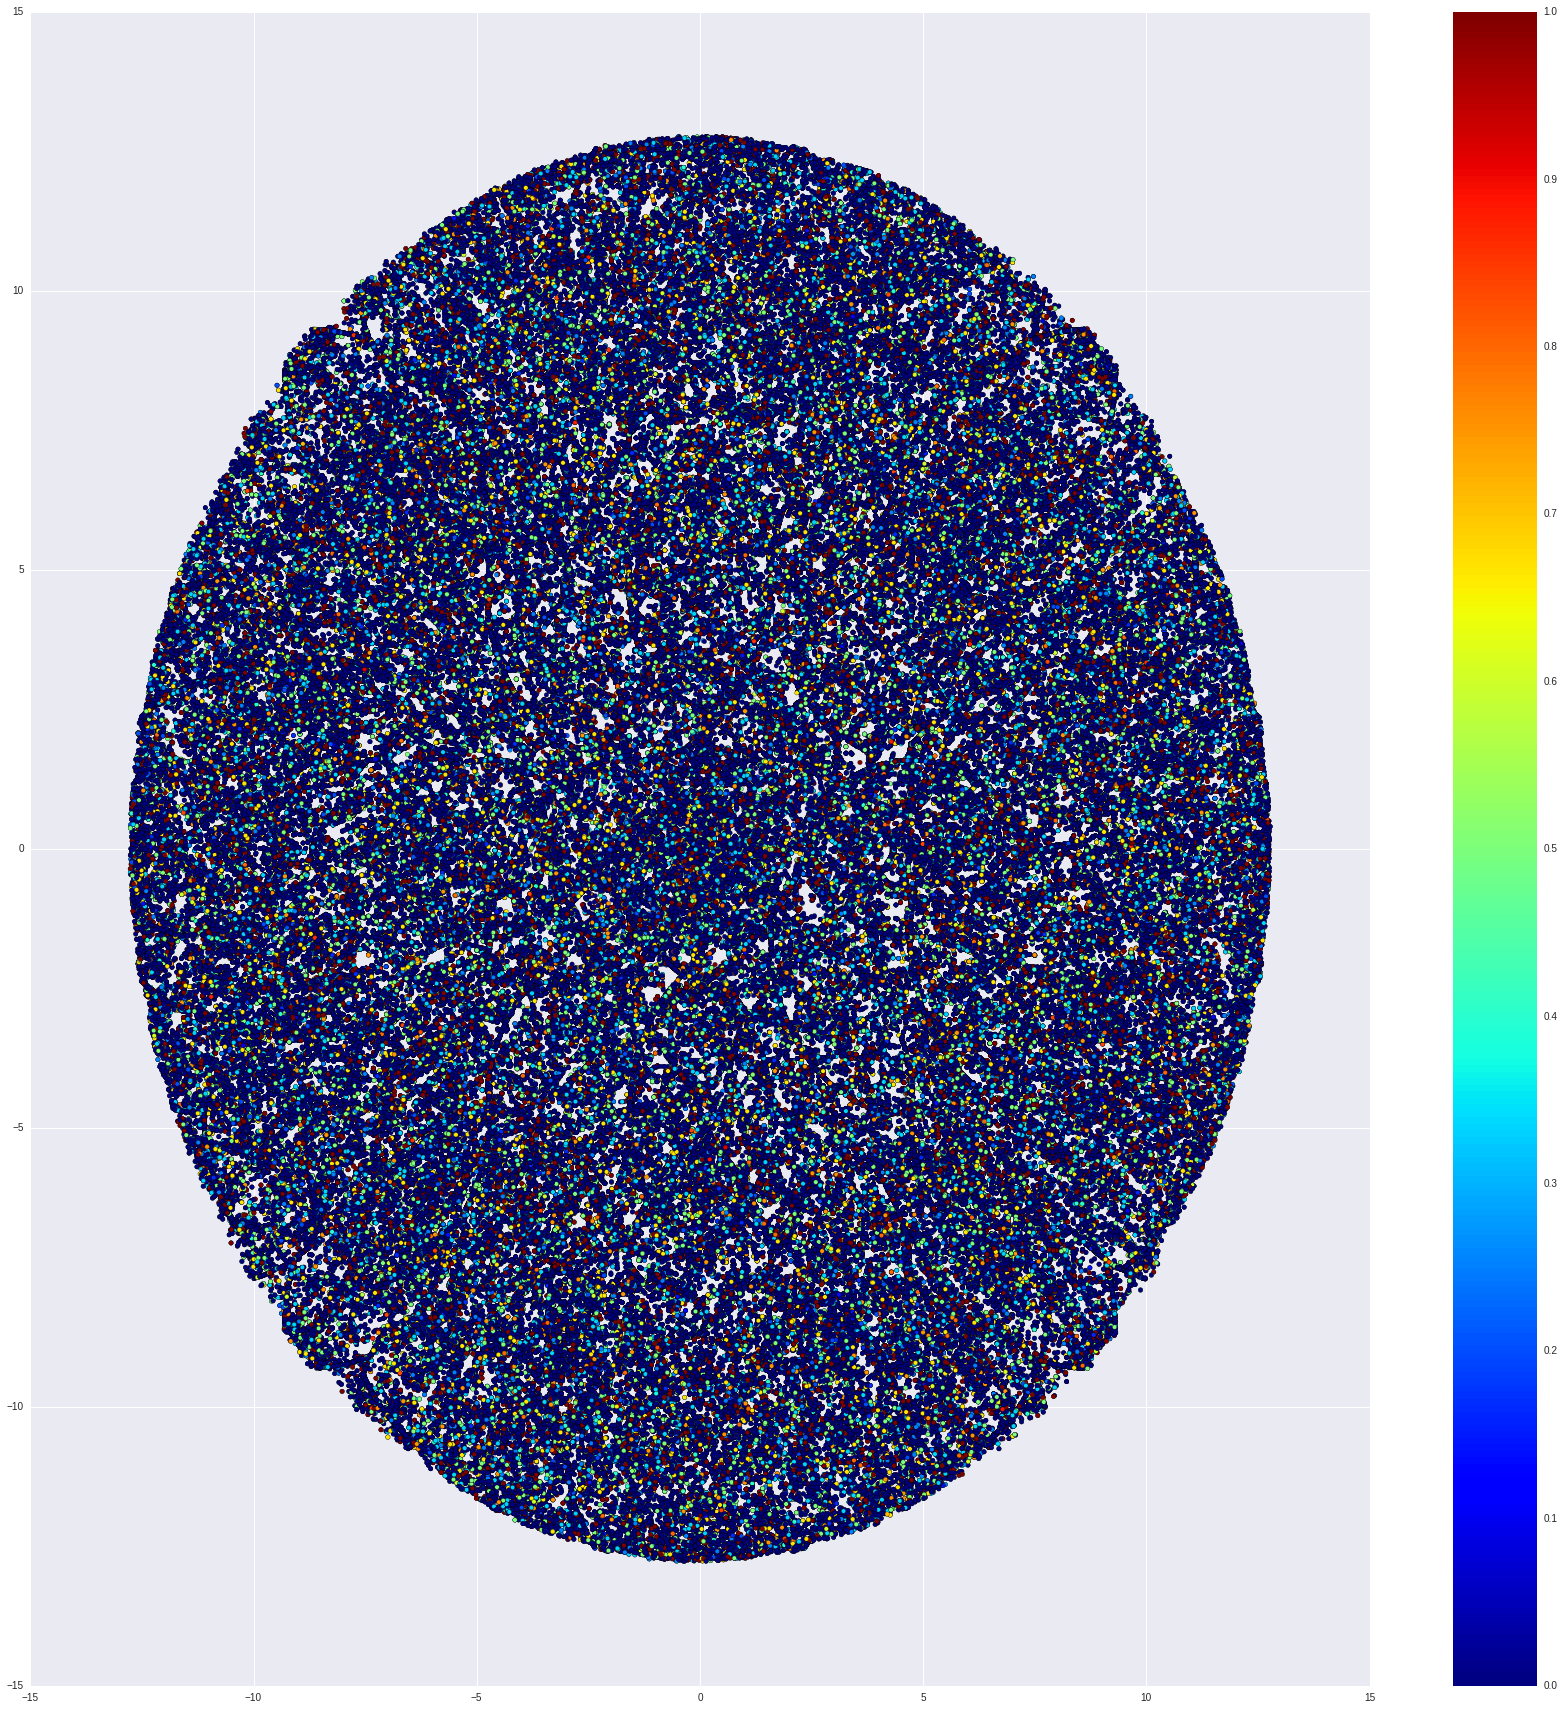

In [50]:
def color_tsne_by_damage():
    tSNE_and_data = np.load("/home/isaac/Desktop/devika/autorun13_unshuffled/np_array_n=None_of_hcad_df_100_perp_1.npy")
    y_data = (np.array(load_nonumerical_data("/home/isaac/Dropbox/data_for_brian/y_df.hd")[0]["y100_mean"]))
#     print load_nonumerical_data("/home/isaac/Dropbox/data_for_brian/y_df.hd")[0]
    print y_data
    #print tSNE_and_data
    #print np.array([tSNE_and_data[:,1],tSNE_and_data[:,0]])
    t_sne_embedding = np.transpose(np.array([tSNE_and_data[:,0],tSNE_and_data[:,1]]))
    print t_sne_embedding
    visualize(t_sne_embedding, show = True, size = 15, display_mode = 'colored', color=y_data, glyph='o')
color_tsne_by_damage()

## displaying points on interactive map

In [51]:
def display_on_map():
    import folium
    import random
    def rgb_to_hex(rgb):
        return '#%02x%02x%02x' % rgb

    meta_data = load_nonumerical_data("/home/isaac/Dropbox/data_for_brian/meta/df_meta.hd")
    xy_points = np.array(zip(meta_data[0].lat,meta_data[0].lon))
    hcad_data, labels = load_data("/home/isaac/Dropbox/data_for_brian/hcad_features/hcad_df_1000.hd",
                          shuffle = False, normalize = False)
    hcad_column = np.clip(hcad_data[:,5],0,300000)
    hcad_column = hcad_column/(.1+np.max(hcad_column))
    # hcad_column=np.nan_to_num(hcad_column)

    heat_data = np.array(zip(meta_data[0].lat,meta_data[0].lon,hcad_column))
    print heat_data

    map = folium.Map(location=[29.717618, -95.400443], zoom_start=10,
                        tiles='Stamen Toner', width=500, height=500)
    print dir(map)
    print dir(map.plugins)
    map.add_tile_layer(folium.plugins.HeatMap(heat_data))
    # for i, point in enumerate(xy_points[:1000]):
    #     value = int(255*hcad_column[i])
    #     color = rgb_to_hex((value,value,value))
    #     map.circle_marker(location=point, radius = 5, fill_color = color, line_color=color, fill_opacity=1)
    map

## Finding distance correlations between tSNE and geographic

In [52]:
def find_distance_correlations():
    meta_data = load_nonumerical_data("/home/isaac/Dropbox/data_for_brian/meta/df_meta.hd")
    xy_points = np.array(zip(meta_data[0].lon,meta_data[0].lat))
    path = "/home/isaac/Desktop/devika/autorun13_unshuffled/np_array_n=None_of_hcad_df_100_perp_1.npy"
    tsne_embedding = np.load(path)
    distances = []
    embed_distances = []
    shuffled_indices = list(range(len(xy_points)))
    shuffle(shuffled_indices)
    samples = [(rand.randint(0,len(xy_points)-1),rand.randint(0, len(xy_points)-1)) for dummy in range(1000000)]
    for sample in samples:
        i,j=sample
        distances.append(math.sqrt( (xy_points[i][0]-xy_points[j][0])**2 + (xy_points[i][1]-xy_points[j][1])**2))
        embed_distances.append(math.sqrt( (tsne_embedding[i][0]-tsne_embedding[j][0])**2 + (tsne_embedding[i][1]-tsne_embedding[j][1])**2))
    #print distances
    #print embed_distances
    print ""
    print pearsonr(distances, embed_distances)
find_distance_correlations()

                

Opening /home/isaac/Dropbox/data_for_brian/meta/df_meta.hd in read-only mode
Opening /home/isaac/Dropbox/data_for_brian/meta/df_meta.hd in read-only mode

(-0.00019858361576975315, 0.84258866387192644)


## correlation between geographic distances and column values

In [53]:
def find_correlations():
#     meta_data = load_nonumerical_data("/home/isaac/Dropbox/data_for_brian/meta/df_meta.hd")
    hcad_data, labels = load_data("/home/isaac/Dropbox/data_for_brian/hcad_features/hcad_df_1000.hd",
                          shuffle = False, normalize = False)
    meta_data = load_nonumerical_data("/home/isaac/Dropbox/data_for_brian/meta/df_meta.hd")

    xy_points = np.array(zip(meta_data[0].lon,meta_data[0].lat))

#     shuffled_indices = list(range(len(xy_points)))
#     shuffle(shuffled_indices)
    print len(xy_points), len(hcad_data)
    samples = [(rand.randint(0,len(hcad_data)-1),rand.randint(0, len(hcad_data)-1)) for dummy in range(5000000)]

    for i in range(len (hcad_data[0,:])):
        hcad_column = hcad_data[:,i]
        label = labels[i]
        column_differences = []
        xy_distances = []

        for sample in samples:
            i,j=sample
            column_differences.append(hcad_column[i]-hcad_column[j])
            xy_distances.append(math.sqrt( (xy_points[i][0]-xy_points[j][0])**2 + (xy_points[i][1]-xy_points[j][1])**2))
        #print distances
        #print embed_distances
        print ""
        print label
        print pearsonr(column_differences, xy_distances)[0]
# find_correlations()

                

## Finding other correlations

In [54]:
def find_other_correlations():
#     meta_data = load_nonumerical_data("/home/isaac/Dropbox/data_for_brian/meta/df_meta.hd")
    hcad_data, labels = load_data("/home/isaac/Dropbox/data_for_brian/hcad_features/hcad_df_1000.hd",
                          shuffle = False, normalize = False)
    path = "/home/isaac/Desktop/devika/autorun13_unshuffled/" + "np_array_n=None_of_hcad_df_100.npy"
    tsne_embedding = np.load(path)

#     shuffled_indices = list(range(len(xy_points)))
#     shuffle(shuffled_indices)
    samples = [(rand.randint(0,len(hcad_data)-1),rand.randint(0, len(hcad_data)-1)) for dummy in range(1000000)]

    for i in range(len (hcad_data[0,:])):
        hcad_column = hcad_data[:,i]
        label = labels[i]
        column_differences = []
        embed_distances = []

        for sample in samples:
            i,j=sample
            column_differences.append(hcad_column[i]-hcad_column[j])
            embed_distances.append(math.sqrt( (tsne_embedding[i][0]-tsne_embedding[j][0])**2 + (tsne_embedding[i][1]-tsne_embedding[j][1])**2))
        #print distances
        #print embed_distances
        print ""
        print label
        print pearsonr(column_differences, embed_distances)[0]
# find_other_correlations()

                